 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
csv_whale = Path('../Resources/whale_returns.csv')
whalereturns_df = pd.read_csv(csv_whale, index_col='Date', infer_datetime_format=True, parse_dates=True)
whalereturns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whalereturns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whalereturns_df.dropna(inplace=True)
whalereturns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
whalereturns_df.isnull().sum()/len(whalereturns_df)*100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
csv_algo = Path('../Resources/algo_returns.csv')
algoreturns_df = pd.read_csv(csv_algo, index_col='Date', infer_datetime_format=True, parse_dates=True)
algoreturns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algoreturns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algoreturns_df.dropna(inplace=True)

In [9]:
algoreturns_df.isnull().sum()/len(algoreturns_df)*100

Algo 1    0.0
Algo 2    0.0
dtype: float64

In [10]:
algoreturns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
csv_tsx = Path('../Resources/sp_tsx_history.csv')
tsxhistory_df = pd.read_csv(csv_tsx, index_col='Date', infer_datetime_format=True, parse_dates=True)
tsxhistory_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check Data Types
tsxhistory_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
tsxhistory_df['Close'] = tsxhistory_df['Close'].str.replace('$','').str.replace(',','').str.replace('.','')
tsxhistory_df = tsxhistory_df.astype(int)
tsxhistory_df.head()

<ipython-input-13-560cf1442a5e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tsxhistory_df['Close'] = tsxhistory_df['Close'].str.replace('$','').str.replace(',','').str.replace('.','')


,Close
Date,
2012-10-01,1237019
2012-10-02,1239123
2012-10-03,1235947
2012-10-04,1244768
2012-10-05,1241899


In [14]:
# Calculate Daily Returns
tsx_history_returns = tsxhistory_df.pct_change()

In [15]:
# Drop nulls
tsx_history_returns.dropna(inplace=True)
tsx_history_returns.isnull().sum()
tsx_history_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [16]:
# Rename `Close` Column to be specific to this portfolio.
tsx_history_returns.columns = ['SP TSX']
tsx_history_returns.head()

,SP TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_daily_returns = pd.concat([whalereturns_df, algoreturns_df, tsx_history_returns], axis="columns", join="inner")
all_daily_returns.sort_index(inplace=True)
all_daily_returns.columns = ['SFM', 'P&L', 'TGM', 'BHI', 'ALGO1', 'ALGO2', 'SP&TX']
all_daily_returns.head()

,SFM,P&L,TGM,BHI,ALGO1,ALGO2,SP&TX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

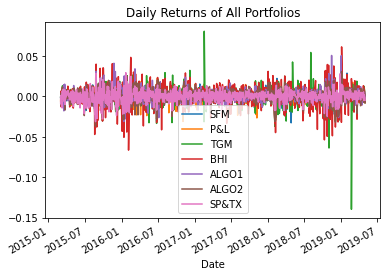

In [18]:
# Plot daily returns of all portfolios
#all_daily_returns = combined_df.pct_change()
all_daily_returns.plot(title="Daily Returns of All Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

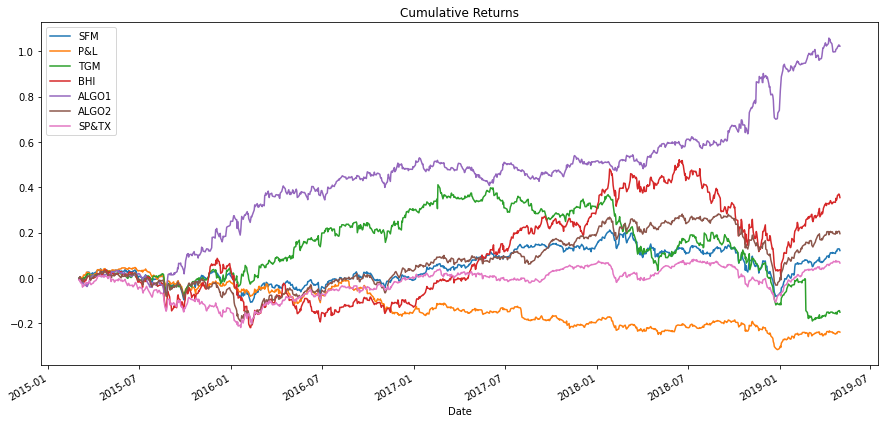

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_daily_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,7), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

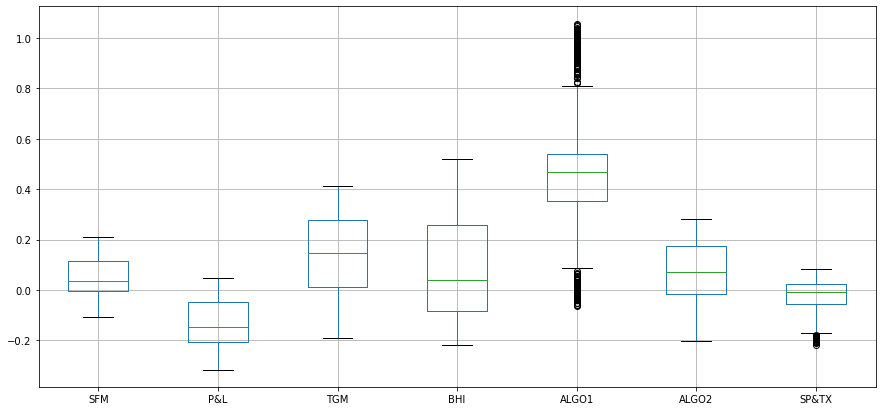

In [20]:
# Box plot to visually show risk
cumulative_returns.boxplot(figsize=(15,7))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
all_portfolios_std = pd.DataFrame(all_daily_returns.std()).rename(columns ={0:"Standard Deviation"})
all_portfolios_std


,Standard Deviation
SFM,0.007828
P&L,0.006982
TGM,0.010883
BHI,0.012826
ALGO1,0.007589
ALGO2,0.008326
SP&TX,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60
sptsx_std = tsxhistory_df.std()

# Determine which portfolios are riskier than the S&P TSX 60
higher_std = all_portfolios_std[all_portfolios_std["Standard Deviation"] > all_portfolios_std.loc["SP&TX", "Standard Deviation"]]
higher_std


,Standard Deviation
SFM,0.007828
TGM,0.010883
BHI,0.012826
ALGO1,0.007589
ALGO2,0.008326


have higher standard deviations than, and are therefore riskier than, the S&P 500.

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
all_annual = all_daily_returns.std() * np.sqrt(252)
all_annual

SFM      0.124259
P&L      0.110841
TGM      0.172759
BHI      0.203599
ALGO1    0.120470
ALGO2    0.132177
SP&TX    0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

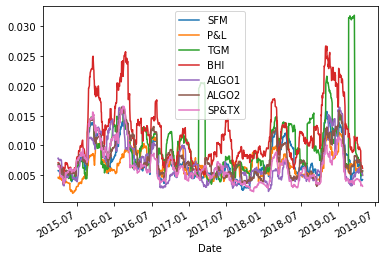

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_rolling_21d = all_daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
all_rolling_21d.plot()

### Calculate and plot the correlation

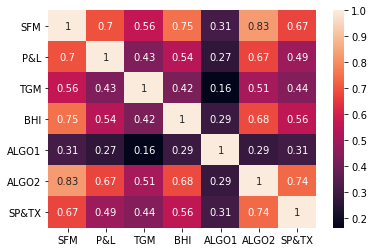

In [25]:
# Calculate the correlation
correlation = all_daily_returns.corr()

# Display de correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True)
plt.show()


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

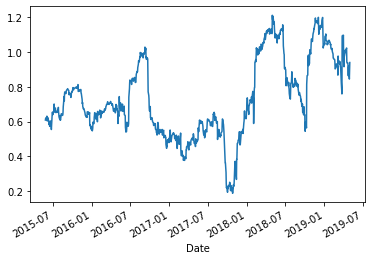

In [26]:
# Calculate covariance of a single portfolio
sfm_covariance = all_daily_returns['SFM'].rolling(window=60).cov(all_daily_returns['SP&TX'])

# Calculate variance of S&P TSX
sptsx_variance = all_daily_returns['SP&TX'].rolling(window=60).var()

# Computing beta
sfm_beta = sfm_covariance / sptsx_variance

# Plot beta trend
sfm_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

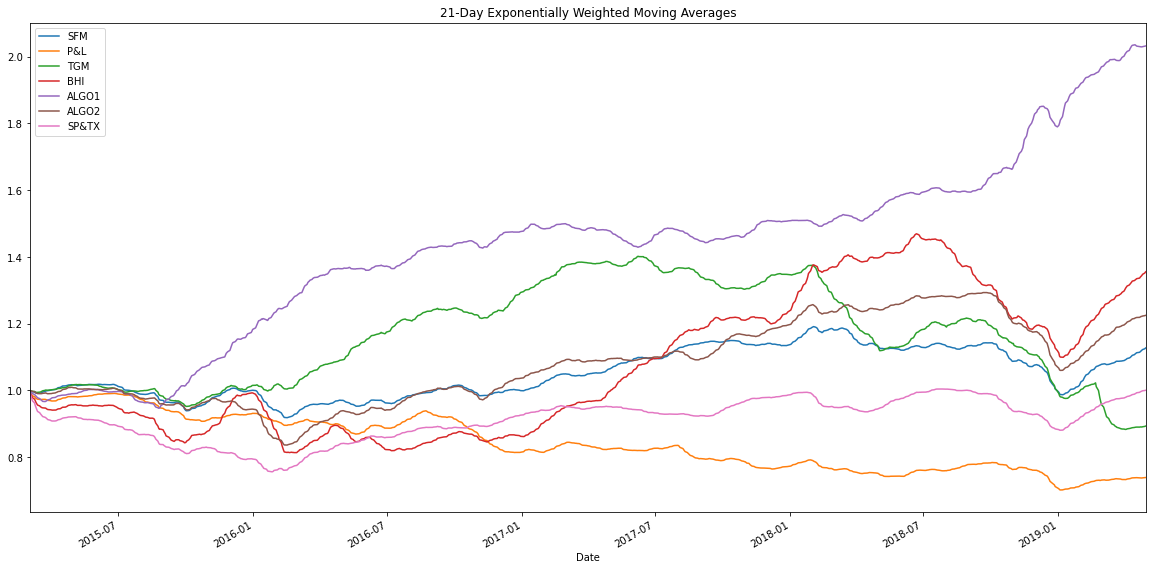

In [27]:
# Use `ewm` to calculate the rolling window
rolling_ewm = all_daily_returns.ewm(span = 21, adjust = False).mean()
(1 + rolling_ewm).cumprod().plot(figsize = (20,10), title="21-Day Exponentially Weighted Moving Averages")
plt.margins(x=0)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_daily_returns.mean() * 252) / (all_daily_returns.std() * np.sqrt(252))



<AxesSubplot:>

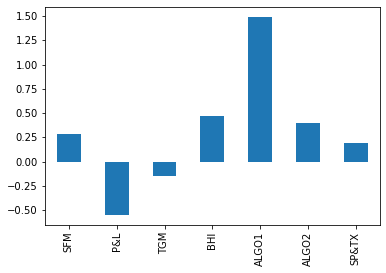

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [30]:
# Reading data from 1st stock
doll_csv = Path('../Resources/DOL.csv')
doll_df = pd.read_csv(doll_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
doll_df.columns=['DOLL']
doll_df.sort_index(inplace=True)
doll_df.tail()


,DOLL
Date,
2019-12-23,48.80
2019-12-24,48.76
2019-12-26,48.93
2019-12-27,49.08
2019-12-30,48.78


In [31]:
# Reading data from 2nd stock
lob_csv = Path('../Resources/L.csv')
lob_df = pd.read_csv(lob_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
lob_df.columns=['LOB']
lob_df.sort_index(inplace=True)
lob_df.tail()

,LOB
Date,
2019-12-23,51.40
2019-12-24,51.45
2019-12-26,51.94
2019-12-27,51.89
2019-12-30,52.01


In [32]:
# Reading data from 3rd stock
shop_csv = Path('../Resources/SHOP.csv')
shop_df = pd.read_csv(shop_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
shop_df.columns=['SHOP']
shop_df.sort_index(inplace=True)
shop_df.tail()

,SHOP
Date,
2019-12-23,389.13
2019-12-24,399.39
2019-12-26,408.75
2019-12-27,408.00
2019-12-30,396.36


In [33]:
# Combine all stocks in a single DataFrame
my_portfolio_df = pd.concat([doll_df, shop_df, lob_df], axis='columns', join='inner')
my_portfolio_df


,DOLL,SHOP,LOB
Date,,,
2015-05-21,51.63,25.68,41.05
2015-05-22,51.30,28.31,40.70
2015-05-26,50.33,29.65,40.05
2015-05-27,50.82,27.50,40.23
2015-05-28,50.58,27.45,40.33
...,...,...,...
2019-12-23,48.80,389.13,51.40
2019-12-24,48.76,399.39,51.45
2019-12-26,48.93,408.75,51.94


In [34]:
# Reset Date index
my_portfolio_df.sort_index(ascending=True, inplace=True)


In [35]:
# Reorganize portfolio data by having a column per symbol


In [37]:
# Calculate daily returns
my_portfolio_returns = my_portfolio_df.pct_change()

# Drop NAs
my_portfolio_returns.dropna(inplace=True)

# Display sample data
my_portfolio_returns.head()

,DOLL,SHOP,LOB
Date,,,
2015-05-22,-0.006392,0.102414,-0.008526
2015-05-26,-0.018908,0.047333,-0.015971
2015-05-27,0.009736,-0.072513,0.004494
2015-05-28,-0.004723,-0.001818,0.002486
2015-05-29,-0.007711,-0.009107,-0.005207


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_portfolio_returns.dot(weights)
my_portfolio_returns.dropna(inplace=True)
my_portfolio_returns = pd.DataFram(my_portfolio_returns)

# Display sample data
my_portfolio_returns.head()

Exception: Dot product shape mismatch, (1160,) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!